# Aufgabe 1: Lineare kleinste Quadrate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, suppress=True)

In [2]:
x = np.array([-2, -1, 1, 2])
y = np.array([26, 0, 8, -10])

n = len(x)

## Aufgabe 1.1

$$p(x) = b + w_1 x^3 + w_2 \sin \left( \frac{\pi}{2} x \right)$$

- Feature-Matrix
- Aufstellung und Lösung der Normalengleichungen

### Feature-Matrix

In [3]:
X = np.stack([np.ones(n), x ** 3, np.sin(np.pi / 2 * x)]).T
print(np.round(X, decimals=4))

[[ 1. -8. -0.]
 [ 1. -1. -1.]
 [ 1.  1.  1.]
 [ 1.  8.  0.]]


### Normalengleichungen

In [4]:
# alternativ: X.T@X
XTX = np.matmul(X.T, X)
print(np.round(XTX, decimals=4))

# alternativ: X.T@y
XTy = np.matmul(X.T, y)
print(XTy)

[[  4.   0.  -0.]
 [  0. 130.   2.]
 [ -0.   2.   2.]]
[  24. -280.    8.]


In [5]:
W = np.linalg.lstsq(XTX, XTy, rcond=None)[0]
print(W)

# test
print(np.linalg.lstsq(X, y, rcond=None)[0])

[ 6.   -2.25  6.25]
[ 6.   -2.25  6.25]


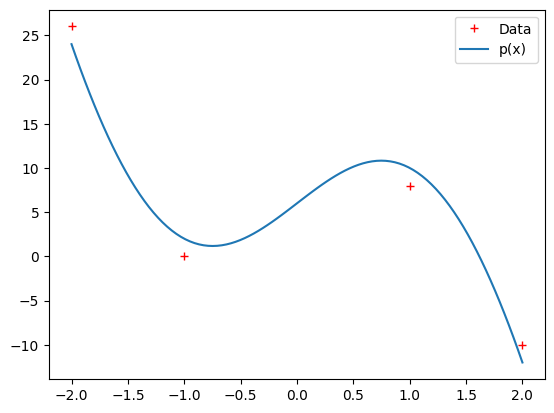

In [6]:
def p(x):
    return W[0] + W[1] * x ** 3 + W[2] * np.sin(np.pi / 2 * x)

x_plot = np.linspace(x[0], x[-1], 100)

plt.plot(x, y, 'r+', label='Data')
plt.plot(x_plot, p(x_plot), label='p(x)')
plt.legend()
plt.show()

### kleinste Quadrate-Fehler

In [7]:
r = y - np.matmul(X, W)
print(r)

err = np.linalg.norm(r, 2) ** 2
print(err)

[ 2. -2. -2.  2.]
16.0


## Aufgabe 1.2

- Prognose für $x=3$

In [8]:
round(p(3), 4)

-61.0

## Aufgabe 1.3

Anwendung des (bisher bekannten) Rechenwegs auf folgende Probleme

#### Aufgabe 1.3.1

$$p(x) = b+w_1x^3 + w_2 \sin(\frac\pi2 x) + w_3 \cos(\frac\pi2 x)$$

In [9]:
X2 = np.vstack([np.ones(n), x ** 3, np.sin(np.pi / 2 * x), np.cos(np.pi / 2 * x)]).T
print(X2)

[[ 1. -8. -0. -1.]
 [ 1. -1. -1.  0.]
 [ 1.  1.  1.  0.]
 [ 1.  8.  0. -1.]]


In [10]:
# direkt lösbar, da quadratisches System
W2 = np.linalg.solve(X2, y)
print('w =', W2)

err2 = np.linalg.norm(y - np.matmul(X2, W2), 2) ** 2
print('err =', round(err2, 4))

w = [ 4.   -2.25  6.25 -4.  ]
err = 0.0


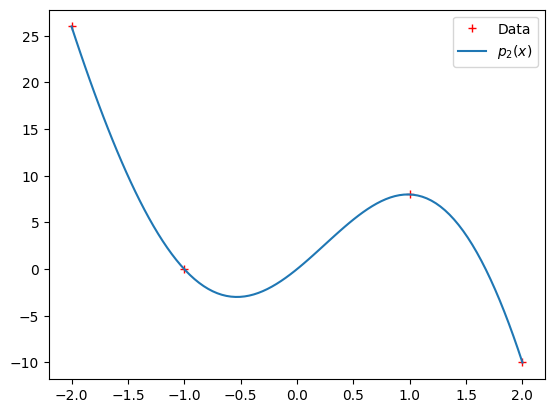

In [11]:
plt.plot(x, y, 'r+', label='Data')
plt.plot(x_plot, W2[0] + W2[1] * x_plot ** 3 + W2[2] * np.sin(np.pi / 2 * x_plot) + W2[3] * np.cos(np.pi / 2 * x_plot), label='$p_2(x)$')
plt.legend()
plt.show()

### Aufgabe 1.3.2

$$p(x) = b + w_1 x^3 + w_2 \sin(\pi x)$$

In [12]:
X3 = np.vstack([np.ones(n), x ** 3, np.sin(np.pi * x)]).T
print(X3)

[[ 1. -8.  0.]
 [ 1. -1. -0.]
 [ 1.  1.  0.]
 [ 1.  8. -0.]]


Matrizen für Normalengleichung

In [13]:
X3.T@X3

array([[  4.,   0.,   0.],
       [  0., 130.,  -0.],
       [  0.,  -0.,   0.]])

$\Rightarrow$ nicht invertierbar $\Rightarrow$ nicht mit Normalengleichung lösbar

W3 = [ 6.     -2.1538  0.    ]
Lst-Sq-Error = 92.9231


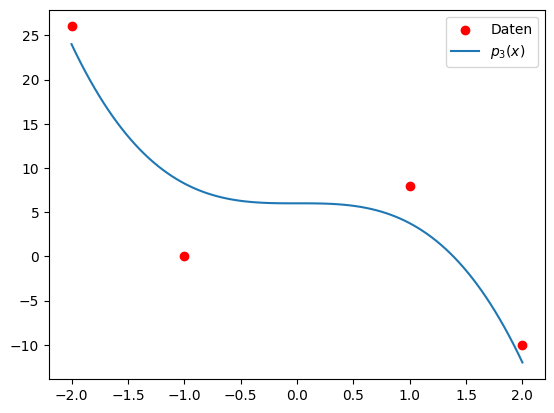

In [14]:
# Lösung mittels Kleinste Quadrate

W3 = np.linalg.lstsq(X3, y, rcond=None)[0]
print('W3 =', W3)

err3 = np.linalg.norm(y - np.matmul(X3, W3)) ** 2
print('Lst-Sq-Error =', f'{err3:.4f}')

plt.scatter(x, y, color='r', label='Daten')
plt.plot(x_plot, W3[0] + W[1] * x_plot ** 3 + W3[2] * np.sin(np.pi * x_plot), label='$p_3(x)$')
plt.legend()
plt.show()

## Aufgabe 1.4

$$p(x) = b + w_1x + w_2x^2 + w_3x^3 + w_4\sin(\frac\pi2x) + w_5\cos(\frac\pi2x)$$

$\Rightarrow$ mehr Gewichte als Datenpunkt $\Rightarrow$ **Overfitting**<br>
$\Rightarrow \mathrm{X}$ hat keinen vollen Spaltenrang $\Rightarrow$ linear abhängige Spalten enthalten<br>
$\Rightarrow \mathrm{X}^T\mathrm{X} \in \R^{6\times6}$ nicht invertierbar<br>
$\Rightarrow$ nicht mit Normalengleichung lösbar

In [15]:
X4 = np.vstack([np.ones(n), x, x ** 2, x ** 3, np.sin(np.pi / 2 * x), np.cos(np.pi / 2 * x)]).T
print(X4)

[[ 1. -2.  4. -8. -0. -1.]
 [ 1. -1.  1. -1. -1.  0.]
 [ 1.  1.  1.  1.  1.  0.]
 [ 1.  2.  4.  8.  0. -1.]]


In [16]:
X.T@X

array([[  4.,   0.,  -0.],
       [  0., 130.,   2.],
       [ -0.,   2.,   2.]])

W4 = [ 2.5455  2.5385  1.4545 -2.8846  4.3462  0.3636]
Lst-Sq-Error = 0.0000


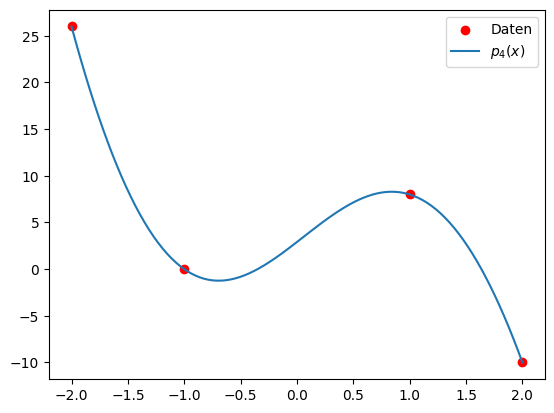

In [17]:
# nicht dasselbe! (später)
W4 = np.linalg.lstsq(X4, y, rcond=None)[0]
print('W4 =', W4)

err4 = np.linalg.norm(y - np.matmul(X4, W4)) ** 2
print('Lst-Sq-Error =', f'{err4:.4f}')

plt.scatter(x, y, color='red', label='Daten')
plt.plot(
    x_plot,
    W4[0] + W4[1] * x_plot + W4[2] * x_plot ** 2 + W4[3] * x_plot ** 3 + W4[4] * np.sin(np.pi / 2 * x_plot) + W4[5] * np.cos(x_plot * np.pi/2),
    label='$p_4(x)$')
plt.legend()
plt.show()

### Aufgabe 1.5

$$p(x)=b+w_1x^3+w_2\sin(w_3 x)$$

$\Rightarrow$ Nicht-Linearität in $w_3$<br>
$\Rightarrow$ mit *linearer* Kleinste-Quadrate-Methode nicht lösbar<br>
$\Rightarrow$ nicht-lineare Kleinste-Quadrate-Methode (später)

W5 = [ 6.     -1.9495  6.0747  1.7743]
error = 16.0


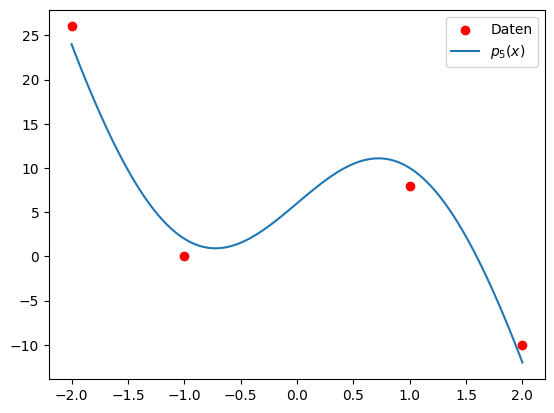

In [18]:
from scipy.optimize import least_squares

def cost_func(w, x, y):
    # Residuums-Vektor
    return y - (w[0] + w[1] * x**3 + w[2] * np.sin(x * w[3]))

# nicht-lineare Kleinste-Quadrate-Methode (später)
W5 = least_squares(cost_func, np.ones(4), args=(x, y)).x
print('W5 =', W5)

error5 = np.linalg.norm(cost_func(W5, x, y)) ** 2
print('error =', round(error5, 4))

plt.scatter(x, y, color='r', label='Daten')
plt.plot(x_plot, W5[0] + W5[1] * x_plot**3 + W5[2] * np.sin(W5[3] * x_plot), label='$p_5(x)$')
plt.legend()
plt.show()